CodeAlpha: Task 3 Predictive Modeling with
Linear Regression


Name: Nardine Hanna

Data science intern.

## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries \& Dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2023/main/data/car_prices.csv')

df.head()

<ipython-input-1-69f679858591>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection


Get dataset size (Number of rows and number of columns)

In [2]:
df.shape

(46578, 16)

Display summary statistics for numeric columns and number of unique values in each column

In [3]:
df.describe(include='all')

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
count,46578.000000,46578,46578,46578,46578,46578,46578,46578,46578.000000,46578,46578,46578,46578,46578,46578,46578
unique,NaN,48,648,1097,71,2,46578,34,NaN,39460,20,17,4686,1021,953,2286
top,NaN,Ford,Altima,Base,Sedan,automatic,5npeb4acxdh702805,fl,NaN,1.0mi,black,black,"ford motor credit company,llc",$11300,$12000,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,NaN,7871,1610,4851,17171,44928,1,7451,NaN,86,9156,20734,1733,168,397,490
mean,2010.203401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.424265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.831316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.944009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1990.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Get Number of missing (null) values

In [4]:
df.isna().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  object 
 14  sellingprice  46578 non-null  object 
 15  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 5.7+ MB


In [6]:
# Check unique values in each column
for col in df.columns:
    print(f'Unique values in {col}: {df[col].unique()}')


Unique values in year: [2013 2014 2012 2002 2007 2008 2011 2015 2010 2005 2006 2009 2004 1998
 2001 2003 1996 1997 2000 1999 1995 1991 1990 1994 1993 1992]
Unique values in make: ['Hyundai' 'Toyota' 'Lexus' 'BMW' 'Ford' 'Kia' 'Chevrolet' 'Cadillac'
 'Mercedes-Benz' 'Jeep' 'Infiniti' 'Lincoln' 'Mazda' 'Chrysler' 'GMC'
 'Honda' 'Dodge' 'Audi' 'Nissan' 'Buick' 'MINI' 'Jaguar' 'Volvo'
 'Mitsubishi' 'Volkswagen' 'Subaru' 'Porsche' 'Isuzu' 'Saturn' 'Pontiac'
 'Scion' 'Acura' 'Ram' 'Land Rover' 'Suzuki' 'Mercury' 'HUMMER' 'Saab'
 'Maserati' 'FIAT' 'Geo' 'smart' 'Oldsmobile' 'Fisker' 'Bentley'
 'Plymouth' 'Ferrari' 'Aston Martin']
Unique values in model: ['Sonata' '4Runner' 'IS 250' 'X5' 'E-Series Van' 'Optima' 'Avalanche'
 'CTS' 'E-Class' 'Forte' 'Wrangler' 'G Sedan' 'MKS' 'Soul' 'Ranger'
 'Mazda6' 'Tundra' 'PT Cruiser' 'Acadia' 'Mustang' 'Odyssey' 'X3' 'STS'
 'F-150' 'Sienna' 'Liberty' 'DTS' 'Sebring' 'Nitro' 'Tacoma' 'Elantra'
 'Q7' 'Maxima' 'Corvette' 'Grand Cherokee' 'FJ Cruiser' 'Fiesta'

In [7]:
# Check if selling prices are greater than or equal to MMR
wrong_prices = df[df['sellingprice'] < df['mmr']]
print(wrong_prices)


       year           make         model   trim          body transmission  \
0      2013        Hyundai        Sonata    GLS         sedan    automatic   
3      2002            BMW            X5   4.4i           SUV    automatic   
4      2014           Ford  E-Series Van  E-250  E-Series Van    automatic   
6      2007      Chevrolet     Avalanche     LS      Crew Cab    automatic   
8      2011  Mercedes-Benz       E-Class   E350         Sedan    automatic   
...     ...            ...           ...    ...           ...          ...   
46564  2012         Toyota       Prius v  Three         Wagon    automatic   
46568  2006      Chevrolet        Impala     LT         Sedan    automatic   
46569  2005       Cadillac      Escalade   Base           SUV    automatic   
46575  2013            BMW      3 Series   328i         Sedan    automatic   
46577  2013            Kia           Rio     LX         Sedan    automatic   

                     vin state  condition    odometer      colo

Checking unique values to avoid wrong entries as null values were 0, so to observe typo or wrong entries which will be considered as null values

In [8]:

unique_counts = df['make'].value_counts()
for value, count in unique_counts.items():
    print(f'{value}: {count}')


Ford: 7871
Chevrolet: 5322
Nissan: 4297
Toyota: 3474
Dodge: 2718
Honda: 2403
Hyundai: 1801
BMW: 1680
Kia: 1639
Chrysler: 1566
Infiniti: 1442
Mercedes-Benz: 1375
Jeep: 1305
Volkswagen: 1038
Lexus: 1024
GMC: 901
Mazda: 701
Cadillac: 606
Audi: 485
Acura: 476
Buick: 467
Lincoln: 457
Subaru: 444
Ram: 397
Pontiac: 377
Mitsubishi: 370
MINI: 289
Saturn: 286
Volvo: 281
Scion: 159
Mercury: 148
Land Rover: 143
Porsche: 129
Jaguar: 122
Suzuki: 96
HUMMER: 84
FIAT: 56
Saab: 41
smart: 36
Oldsmobile: 24
Isuzu: 19
Maserati: 10
Bentley: 8
Fisker: 3
Plymouth: 3
Geo: 2
Aston Martin: 2
Ferrari: 1


In [9]:

unique_counts = df['year'].value_counts()
for value, count in unique_counts.items():
    print(f'{value}: {count}')

2013: 8682
2012: 8448
2014: 6887
2011: 4072
2008: 2646
2007: 2466
2010: 2254
2006: 2168
2009: 1826
2005: 1641
2004: 1323
2003: 1058
2015: 816
2002: 761
2001: 553
2000: 350
1999: 230
1998: 158
1997: 92
1996: 61
1995: 44
1994: 16
1993: 8
1992: 8
1991: 6
1990: 4


In [10]:

unique_counts = df['model'].value_counts()
for value, count in unique_counts.items():
    print(f'{value}: {count}')


Altima: 1610
F-150: 1179
Fusion: 1115
Camry: 1081
Escape: 1063
Focus: 921
Accord: 823
Impala: 721
G Sedan: 717
Corolla: 685
3 Series: 682
Grand Caravan: 675
Civic: 672
Malibu: 598
Explorer: 592
Cruze: 557
Sonata: 556
Silverado 1500: 556
Elantra: 546
Maxima: 519
Town and Country: 502
Edge: 479
Taurus: 432
C-Class: 432
Mustang: 428
Sentra: 422
Avenger: 411
Rogue: 409
Equinox: 404
Charger: 400
200: 396
Optima: 393
Jetta: 384
Grand Cherokee: 375
5 Series: 334
Wrangler: 333
E-Class: 331
300: 327
Odyssey: 304
Sorento: 291
Journey: 291
CR-V: 282
RAV4: 282
Passat: 271
1500: 271
Sienna: 266
Tahoe: 262
Soul: 255
Forte: 254
Mazda3: 239
Fiesta: 233
Murano: 232
Versa: 231
F-250 Super Duty: 219
Liberty: 215
Sierra 1500: 212
Cooper: 211
Suburban: 210
RX 350: 204
Expedition: 202
X5: 186
IS 250: 186
ES 350: 183
TL: 178
Durango: 175
Ram Pickup 1500: 174
Pathfinder: 171
G Coupe: 170
Traverse: 168
Sonic: 168
Pilot: 168
A4: 167
Cobalt: 165
Camaro: 163
Acadia: 163
CTS: 160
Highlander: 156
G6: 152
Patriot: 1

In [11]:

unique_counts = df['trim'].value_counts()
for value, count in unique_counts.items():
    print(f'{value}: {count}')

Base: 4851
SE: 3940
LX: 1912
Limited: 1506
LT: 1501
XLT: 1378
LS: 1151
LE: 1136
S: 1018
SXT: 1004
GLS: 998
Touring: 977
2.5 S: 939
SEL: 903
EX: 802
Sport: 795
2.5: 556
SLT: 514
EX-L: 486
LTZ: 457
SV: 419
G37x: 395
V6: 386
XL: 339
328i: 309
G37 Journey: 304
SL: 304
Lariat: 291
Titanium: 286
1LT: 275
3.5 SV: 269
LT Fleet: 257
Laredo: 246
LS Fleet: 225
2LT: 187
SE PZEV: 187
R/T: 185
SLE: 184
Premium: 176
Work Truck: 172
GT: 170
Denali: 159
Luxury: 158
3.5 S: 156
+: 154
ES: 150
XLE: 135
i Sport: 135
LT1: 129
SR5: 125
C250 Sport: 124
FX4: 123
1.6 SV: 121
2.5i Premium PZEV: 118
XLS: 114
CXL: 111
ST: 111
E-250: 109
L: 103
2500: 99
3.2: 97
i Touring: 96
1500 LS: 94
C: 94
SLT-1: 92
EX-L V-6: 89
G37: 89
528i: 89
GS: 88
1.8 S: 88
Unlimited Sahara: 87
E350: 85
SS: 85
335i: 82
Tradesman: 81
XE: 81
535i: 81
3.5 SL: 80
2.0T Premium quattro: 80
LE 7-Passenger Mobility Auto Access: 77
328i xDrive: 74
HSE: 73
Platinum: 72
Laramie: 71
3.5 SE: 71
2.0T: 70
1500: 70
Eddie Bauer: 68
2.0 SR: 68
S550: 66
E-350

In [12]:

unique_counts = df['body'].value_counts()
for value, count in unique_counts.items():
    print(f'{value}: {count}')

Sedan: 17171
SUV: 9942
sedan: 3686
suv: 1994
Hatchback: 1869
Minivan: 1817
Coupe: 1317
Wagon: 1215
Crew Cab: 1126
Convertible: 765
SuperCrew: 610
G Sedan: 566
hatchback: 401
minivan: 372
SuperCab: 369
Regular Cab: 333
Extended Cab: 319
crew cab: 283
Van: 280
Quad Cab: 268
coupe: 246
wagon: 219
convertible: 154
g sedan: 151
G Coupe: 138
supercrew: 130
Double Cab: 106
extended cab: 78
E-Series Van: 78
regular cab: 66
supercab: 64
van: 52
quad cab: 50
CrewMax Cab: 44
King Cab: 33
g coupe: 32
double cab: 31
G Convertible: 22
e-series van: 22
Genesis Coupe: 17
Club Cab: 17
Access Cab: 15
Koup: 12
Promaster Cargo Van: 9
g convertible: 8
CTS Coupe: 8
crewmax cab: 8
Beetle Convertible: 8
king cab: 7
Elantra Coupe: 6
genesis coupe: 5
mega cab: 5
Xtracab: 4
access cab: 4
Mega Cab: 3
Q60 Convertible: 2
G37 Convertible: 2
cts coupe: 2
Q60 Coupe: 2
CTS-V Coupe: 2
TSX Sport Wagon: 2
Cab Plus 4: 2
beetle convertible: 1
regular-cab: 1
GranTurismo Convertible: 1
tsx sport wagon: 1
CTS Wagon: 1
granturi

We found out that several items were written once in upper cases and once in lower cases so we need to standardize these strings

In [13]:

df['body'] = df['body'].str.lower()
unique_counts = df['body'].value_counts()
for value, count in unique_counts.items():
    print(f'{value.capitalize()}: {count}')


Sedan: 20857
Suv: 11936
Hatchback: 2270
Minivan: 2189
Coupe: 1563
Wagon: 1434
Crew cab: 1409
Convertible: 919
Supercrew: 740
G sedan: 717
Supercab: 433
Regular cab: 399
Extended cab: 397
Van: 332
Quad cab: 318
G coupe: 170
Double cab: 137
E-series van: 100
Crewmax cab: 52
King cab: 40
G convertible: 30
Genesis coupe: 22
Access cab: 19
Club cab: 17
Koup: 12
Cts coupe: 10
Promaster cargo van: 10
Beetle convertible: 9
Mega cab: 8
Elantra coupe: 6
Xtracab: 5
Tsx sport wagon: 3
Cab plus 4: 2
Q60 convertible: 2
G37 convertible: 2
Granturismo convertible: 2
Cts-v coupe: 2
Q60 coupe: 2
Regular-cab: 1
Cts wagon: 1
Transit van: 1


In [14]:

unique_counts = df['transmission'].value_counts()
for value, count in unique_counts.items():
    print(f'{value}: {count}')

automatic: 44928
manual: 1650


The next column which is 'vin' will be skipped since all its values will be unique (ID)

State Column

In [15]:

unique_counts = df['state'].value_counts()
for value, count in unique_counts.items():
    print(f'{value}: {count}')

fl: 7451
ca: 6440
tx: 4056
ga: 3008
nj: 2302
pa: 2287
il: 2082
oh: 1984
tn: 1891
nc: 1771
mo: 1500
mi: 1394
nv: 1154
va: 989
md: 981
wi: 979
mn: 870
az: 782
co: 712
wa: 686
ma: 600
ny: 498
ne: 392
sc: 389
in: 380
pr: 242
ms: 169
ut: 158
la: 157
hi: 139
or: 110
nm: 15
ok: 9
al: 1


In [16]:

unique_counts = df['condition'].value_counts()
for value, count in unique_counts.items():
    print(f'{value}: {count}')

1.9: 3651
3.5: 2239
3.7: 2227
4.3: 2135
4.2: 2130
4.4: 2112
3.6: 2058
4.1: 1971
2.9: 1715
4.0: 1702
3.9: 1698
2.0: 1678
3.8: 1668
2.8: 1638
3.4: 1443
2.7: 1372
4.8: 1111
4.9: 1092
4.6: 1073
4.5: 1066
2.5: 1065
2.6: 1000
4.7: 935
3.0: 898
3.3: 877
5.0: 875
3.2: 849
2.4: 824
2.1: 808
3.1: 757
2.3: 677
1.0: 577
2.2: 536
1.8: 32
1.7: 22
1.4: 18
1.6: 17
1.5: 12
1.3: 11
1.2: 5
1.1: 4


Odometer has a lot of unique values which is hard to dsplay them all

In [17]:

unique_counts = df['odometer'].value_counts()
for value, count in unique_counts.items():
    print(f'{value}: {count}')

Streaming output truncated to the last 5000 lines.
39468.0mi: 1
74774.0mi: 1
58224.0mi: 1
119227.0mi: 1
116000.0mi: 1
8562.0mi: 1
30871.0mi: 1
1200.0mi: 1
101288.0mi: 1
57533.0mi: 1
29058.0mi: 1
81590.0mi: 1
31919.0mi: 1
53949.0mi: 1
81976.0mi: 1
100316.0mi: 1
259699.0mi: 1
34206.0mi: 1
19285.0mi: 1
45862.0mi: 1
30840.0mi: 1
184619.0mi: 1
46649.0mi: 1
76998.0mi: 1
43090.0mi: 1
58765.0mi: 1
29779.0mi: 1
81058.0mi: 1
58085.0mi: 1
21519.0mi: 1
50222.0mi: 1
52149.0mi: 1
22179.0mi: 1
100034.0mi: 1
34582.0mi: 1
118317.0mi: 1
48767.0mi: 1
111946.0mi: 1
61214.0mi: 1
123991.0mi: 1
113453.0mi: 1
152798.0mi: 1
51495.0mi: 1
35021.0mi: 1
115742.0mi: 1
6649.0mi: 1
27602.0mi: 1
56577.0mi: 1
33798.0mi: 1
8587.0mi: 1
189650.0mi: 1
31385.0mi: 1
44883.0mi: 1
74897.0mi: 1
94471.0mi: 1
21531.0mi: 1
157564.0mi: 1
127320.0mi: 1
59321.0mi: 1
193571.0mi: 1
35711.0mi: 1
2791.0mi: 1
43111.0mi: 1
55365.0mi: 1
110225.0mi: 1
10563.0mi: 1
161545.0mi: 1
99048.0mi: 1
23218.0mi: 1
38103.0mi: 1
94805.0mi: 1
65682.0mi: 1

In [18]:

unique_counts = df['color'].value_counts()
for value, count in unique_counts.items():
    print(f'{value}: {count}')

black: 9156
white: 8693
gray: 7046
silver: 6982
blue: 4244
red: 3685
—: 2246
gold: 948
green: 891
burgundy: 785
beige: 744
brown: 529
orange: 195
purple: 137
off-white: 129
yellow: 99
charcoal: 49
turquoise: 15
pink: 3
lime: 2


In [19]:

unique_counts = df['interior'].value_counts()
for value, count in unique_counts.items():
    print(f'{value}: {count}')


black: 20734
gray: 15020
beige: 4917
tan: 3777
—: 988
brown: 694
blue: 101
red: 92
silver: 88
off-white: 39
purple: 31
gold: 26
white: 23
burgundy: 20
green: 16
orange: 11
yellow: 1


Removing special character and replace it with NaN

In [20]:

df['color'] = df['color'].replace('—', np.nan)
unique_counts = df['color'].value_counts(dropna=False)
for value, count in unique_counts.items():
    print(f'{value}: {count}')


black: 9156
white: 8693
gray: 7046
silver: 6982
blue: 4244
red: 3685
nan: 2246
gold: 948
green: 891
burgundy: 785
beige: 744
brown: 529
orange: 195
purple: 137
off-white: 129
yellow: 99
charcoal: 49
turquoise: 15
pink: 3
lime: 2


In [21]:

df['interior'] = df['interior'].replace('—', np.nan)
unique_counts = df['interior'].value_counts(dropna=False)
for value, count in unique_counts.items():
    print(f'{value}: {count}')


black: 20734
gray: 15020
beige: 4917
tan: 3777
nan: 988
brown: 694
blue: 101
red: 92
silver: 88
off-white: 39
purple: 31
gold: 26
white: 23
burgundy: 20
green: 16
orange: 11
yellow: 1


In [22]:

unique_counts = df['seller'].value_counts()
for value, count in unique_counts.items():
    print(f'{value}: {count}')

ford motor credit company,llc: 1733
the hertz corporation: 1561
nissan-infiniti lt: 1514
santander consumer: 1425
avis corporation: 1158
nissan infiniti lt: 959
wells fargo dealer services: 811
enterprise veh exchange/rental: 580
tdaf remarketing: 576
ge fleet services for itself/servicer: 548
ahfc/honda lease trust/hvt, inc. eot: 544
chrysler capital: 527
hyundai motor finance: 521
jpmorgan chase bank,n.a.: 515
financial services remarketing (lease): 511
gm financial: 495
mercedes-benz financial services: 442
avis budget group: 439
kia motors america, inc: 401
dt credit corporation: 401
capital one auto finance: 397
credit acceptance corp/vrs/southfield: 392
lease plan usa: 389
toyota financial services: 384
lexus financial services: 380
ford motor credit company,llc pd: 375
gm remarketing: 355
world omni financial corporation: 352
dtg operations inc: 344
wheels exchange llc: 312
nissan motor acceptance corporation: 280
ars/avis budget group: 279
ford motor credit company: 275
ford-li

In [23]:

df['Model_trim'] = df['model'] + (' ') + df['trim']
df.drop('Model_trim', axis=1)
print(df)


       year      make         model         trim          body transmission  \
0      2013   Hyundai        Sonata          GLS         sedan    automatic   
1      2014    Toyota       4Runner          SR5           suv    automatic   
2      2012     Lexus        IS 250         Base         sedan    automatic   
3      2002       BMW            X5         4.4i           suv    automatic   
4      2014      Ford  E-Series Van        E-250  e-series van    automatic   
...     ...       ...           ...          ...           ...          ...   
46573  2013      Ford          Edge           SE           suv    automatic   
46574  2012  Infiniti       G Sedan  G37 Journey       g sedan    automatic   
46575  2013       BMW      3 Series         328i         sedan    automatic   
46576  2013    Toyota         Camry           LE         sedan    automatic   
46577  2013       Kia           Rio           LX         sedan    automatic   

                     vin state  condition    odomet

Check for duplicates

In [24]:
print(df.duplicated().sum())

0


Removing $ from mmr and selling price column in order to change object type to int.

In [25]:

df['mmr'] = df['mmr'].str.replace('$', '')
df['sellingprice'] = df['sellingprice'].str.replace('$', '')

df.head()


<ipython-input-25-d1ba5ec08162>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['mmr'] = df['mmr'].str.replace('$', '')
<ipython-input-25-d1ba5ec08162>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['sellingprice'] = df['sellingprice'].str.replace('$', '')


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,Model_trim
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT),Sonata GLS
1,2014,Toyota,4Runner,SR5,suv,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,NaN,award auto sales and leasing inc,28700,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST),4Runner SR5
2,2012,Lexus,IS 250,Base,sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST),IS 250 Base
3,2002,BMW,X5,4.4i,suv,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST),X5 4.4i
4,2014,Ford,E-Series Van,E-250,e-series van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST),E-Series Van E-250


Removing 'mi' from odometer column in order to change object type to int.

In [26]:

df['odometer'] = df['odometer'].str.replace('mi', '')

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,Model_trim
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT),Sonata GLS
1,2014,Toyota,4Runner,SR5,suv,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,NaN,award auto sales and leasing inc,28700,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST),4Runner SR5
2,2012,Lexus,IS 250,Base,sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST),IS 250 Base
3,2002,BMW,X5,4.4i,suv,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST),X5 4.4i
4,2014,Ford,E-Series Van,E-250,e-series van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST),E-Series Van E-250


In [27]:
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer         object
color            object
interior         object
seller           object
mmr              object
sellingprice     object
saledate         object
Model_trim       object
dtype: object

Change sellingprice, mmr, and odometer data types to integer

In [28]:
df['mmr']=df['mmr'].astype('int64')
df['sellingprice']=df['sellingprice'].astype('int64')
df['odometer']=df['odometer'].astype('float64')

df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr               int64
sellingprice      int64
saledate         object
Model_trim       object
dtype: object

In [29]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,Model_trim
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT),Sonata GLS
1,2014,Toyota,4Runner,SR5,suv,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,NaN,award auto sales and leasing inc,28700,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST),4Runner SR5
2,2012,Lexus,IS 250,Base,sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST),IS 250 Base
3,2002,BMW,X5,4.4i,suv,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST),X5 4.4i
4,2014,Ford,E-Series Van,E-250,e-series van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST),E-Series Van E-250


Since odometer has all values .0 change float to int

In [30]:
df['odometer']=df['odometer'].astype('int64')

df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer          int64
color            object
interior         object
seller           object
mmr               int64
sellingprice      int64
saledate         object
Model_trim       object
dtype: object

In [31]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,Model_trim
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404,black,gray,the hertz corporation,11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT),Sonata GLS
1,2014,Toyota,4Runner,SR5,suv,automatic,jtezu5jr2e5064567,fl,4.9,17846,gray,NaN,award auto sales and leasing inc,28700,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST),4Runner SR5
2,2012,Lexus,IS 250,Base,sedan,automatic,jthbf5c24c5168599,fl,4.1,21122,silver,black,lexus financial services,22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST),IS 250 Base
3,2002,BMW,X5,4.4i,suv,automatic,5uxfb33562lh33864,fl,1.9,145303,black,black,peddle llc,3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST),X5 4.4i
4,2014,Ford,E-Series Van,E-250,e-series van,automatic,1ftne2ew0eda31832,wa,4.9,6714,white,gray,u-haul,22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST),E-Series Van E-250


In [32]:
print(df['saledate'].unique())



['Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)'
 'Wed Feb 18 2015 07:15:00 GMT-0800 (PST)'
 'Tue Jan 20 2015 01:30:00 GMT-0800 (PST)' ...
 'Wed Mar 04 2015 01:45:00 GMT-0800 (PST)'
 'Wed Jun 17 2015 02:45:00 GMT-0700 (PDT)'
 'Tue Apr 28 2015 04:30:00 GMT-0700 (PDT)']


Converting data type of saledate to datetime.

In [33]:

df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce', utc=True)
print(df)



       year      make         model         trim          body transmission  \
0      2013   Hyundai        Sonata          GLS         sedan    automatic   
1      2014    Toyota       4Runner          SR5           suv    automatic   
2      2012     Lexus        IS 250         Base         sedan    automatic   
3      2002       BMW            X5         4.4i           suv    automatic   
4      2014      Ford  E-Series Van        E-250  e-series van    automatic   
...     ...       ...           ...          ...           ...          ...   
46573  2013      Ford          Edge           SE           suv    automatic   
46574  2012  Infiniti       G Sedan  G37 Journey       g sedan    automatic   
46575  2013       BMW      3 Series         328i         sedan    automatic   
46576  2013    Toyota         Camry           LE         sedan    automatic   
46577  2013       Kia           Rio           LX         sedan    automatic   

                     vin state  condition  odometer

Converting data type of saledate to datetime.

In [34]:
df['saledate'] = pd.to_datetime(df['saledate'], utc=True)
print(df.dtypes)


year                          int64
make                         object
model                        object
trim                         object
body                         object
transmission                 object
vin                          object
state                        object
condition                   float64
odometer                      int64
color                        object
interior                     object
seller                       object
mmr                           int64
sellingprice                  int64
saledate        datetime64[ns, UTC]
Model_trim                   object
dtype: object


In [35]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,Model_trim
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404,black,gray,the hertz corporation,11000,10900,2015-06-01 19:30:00+00:00,Sonata GLS
1,2014,Toyota,4Runner,SR5,suv,automatic,jtezu5jr2e5064567,fl,4.9,17846,gray,NaN,award auto sales and leasing inc,28700,29900,2015-02-17 23:15:00+00:00,4Runner SR5
2,2012,Lexus,IS 250,Base,sedan,automatic,jthbf5c24c5168599,fl,4.1,21122,silver,black,lexus financial services,22200,24200,2015-01-19 17:30:00+00:00,IS 250 Base
3,2002,BMW,X5,4.4i,suv,automatic,5uxfb33562lh33864,fl,1.9,145303,black,black,peddle llc,3675,3200,2015-03-03 23:10:00+00:00,X5 4.4i
4,2014,Ford,E-Series Van,E-250,e-series van,automatic,1ftne2ew0eda31832,wa,4.9,6714,white,gray,u-haul,22500,22100,2015-02-17 22:45:00+00:00,E-Series Van E-250


Reducing the "body" categories using an automated method for reducing the body column values.


In [36]:

body_mapping = {
    'sedan': 'Sedan',
    'suv': 'SUV',
    'hatchback': 'Hatchback',
    'minivan': 'Minivan',
    'coupe': 'Coupe',
    'wagon': 'Wagon',
    'crew cab': 'Pickup Truck',
    'convertible': 'Convertible',
    'supercrew': 'Pickup Truck',
    'g sedan': 'Sedan',
    'supercab': 'Pickup Truck',
    'regular cab': 'Pickup Truck',
    'extended cab': 'Pickup Truck',
    'van': 'Minivan',
    'quad cab': 'Pickup Truck',
    'g coupe': 'Coupe',
    'double cab': 'Pickup Truck',
    'e-series van': 'Minivan',
    'crewmax cab': 'Pickup Truck',
    'king cab': 'Pickup Truck',
    'g convertible': 'Convertible',
    'genesis coupe': 'Coupe',
    'access cab': 'Pickup Truck',
    'club cab': 'Pickup Truck',
    'koup': 'Coupe',
    'cts coupe': 'Coupe',
    'promaster cargo van': 'Minivan',
    'beetle convertible': 'Convertible',
    'mega cab': 'Pickup Truck',
    'elantra coupe': 'Coupe',
    'xtracab': 'Pickup Truck',
    'tsx sport wagon': 'Wagon',
    'cab plus 4': 'Pickup Truck',
    'q60 convertible': 'Convertible',
    'g37 convertible': 'Convertible',
    'granturismo convertible': 'Convertible',
    'cts-v coupe': 'Coupe',
    'q60 coupe': 'Coupe',
    'regular-cab': 'Pickup Truck',
    'cts wagon': 'Wagon',
    'transit van': 'Minivan'
}
df['body'] = df['body'].replace(body_mapping)
print(df)


       year      make         model         trim     body transmission  \
0      2013   Hyundai        Sonata          GLS    Sedan    automatic   
1      2014    Toyota       4Runner          SR5      SUV    automatic   
2      2012     Lexus        IS 250         Base    Sedan    automatic   
3      2002       BMW            X5         4.4i      SUV    automatic   
4      2014      Ford  E-Series Van        E-250  Minivan    automatic   
...     ...       ...           ...          ...      ...          ...   
46573  2013      Ford          Edge           SE      SUV    automatic   
46574  2012  Infiniti       G Sedan  G37 Journey    Sedan    automatic   
46575  2013       BMW      3 Series         328i    Sedan    automatic   
46576  2013    Toyota         Camry           LE    Sedan    automatic   
46577  2013       Kia           Rio           LX    Sedan    automatic   

                     vin state  condition  odometer   color interior  \
0      5npeb4acxdh702805    ma        3

In [37]:
df_copy = df.copy()

In [38]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,Model_trim
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4acxdh702805,ma,3.9,50404,black,gray,the hertz corporation,11000,10900,2015-06-01 19:30:00+00:00,Sonata GLS
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846,gray,NaN,award auto sales and leasing inc,28700,29900,2015-02-17 23:15:00+00:00,4Runner SR5
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122,silver,black,lexus financial services,22200,24200,2015-01-19 17:30:00+00:00,IS 250 Base
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303,black,black,peddle llc,3675,3200,2015-03-03 23:10:00+00:00,X5 4.4i
4,2014,Ford,E-Series Van,E-250,Minivan,automatic,1ftne2ew0eda31832,wa,4.9,6714,white,gray,u-haul,22500,22100,2015-02-17 22:45:00+00:00,E-Series Van E-250


## Data Pre-Processing & Cleaning




In [39]:
df_copy.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,Model_trim
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4acxdh702805,ma,3.9,50404,black,gray,the hertz corporation,11000,10900,2015-06-01 19:30:00+00:00,Sonata GLS
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846,gray,NaN,award auto sales and leasing inc,28700,29900,2015-02-17 23:15:00+00:00,4Runner SR5
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122,silver,black,lexus financial services,22200,24200,2015-01-19 17:30:00+00:00,IS 250 Base
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303,black,black,peddle llc,3675,3200,2015-03-03 23:10:00+00:00,X5 4.4i
4,2014,Ford,E-Series Van,E-250,Minivan,automatic,1ftne2ew0eda31832,wa,4.9,6714,white,gray,u-haul,22500,22100,2015-02-17 22:45:00+00:00,E-Series Van E-250


Rename columns

In [40]:
column_mapping = {
    'mmr': 'mmr in $',
    'sellingprice': 'sellingprice in $',
    'odometer':'odometer in miles'
}

df_copy = df_copy.rename(columns=column_mapping)

In [41]:
df_copy.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer in miles,color,interior,seller,mmr in $,sellingprice in $,saledate,Model_trim
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4acxdh702805,ma,3.9,50404,black,gray,the hertz corporation,11000,10900,2015-06-01 19:30:00+00:00,Sonata GLS
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846,gray,NaN,award auto sales and leasing inc,28700,29900,2015-02-17 23:15:00+00:00,4Runner SR5
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122,silver,black,lexus financial services,22200,24200,2015-01-19 17:30:00+00:00,IS 250 Base
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303,black,black,peddle llc,3675,3200,2015-03-03 23:10:00+00:00,X5 4.4i
4,2014,Ford,E-Series Van,E-250,Minivan,automatic,1ftne2ew0eda31832,wa,4.9,6714,white,gray,u-haul,22500,22100,2015-02-17 22:45:00+00:00,E-Series Van E-250


In color and interior columns, there were special characters in multiple rows which we previously replaced to null values

Handling missing values in color and interior columns

In [42]:
unique_values = df_copy['color'].unique()
print(f"Number of unique values in 'color': {len(unique_values)}")
print("Unique values in 'color':")
print(unique_values)



Number of unique values in 'color': 20
Unique values in 'color':
['black' 'gray' 'silver' 'white' 'blue' 'burgundy' 'beige' 'gold' 'green'
 'red' 'purple' nan 'yellow' 'brown' 'turquoise' 'orange' 'off-white'
 'charcoal' 'pink' 'lime']


In [43]:

unique_counts = df_copy['color'].value_counts(dropna=False)
for value, count in unique_counts.items():
    print(f'{value}: {count}')



black: 9156
white: 8693
gray: 7046
silver: 6982
blue: 4244
red: 3685
nan: 2246
gold: 948
green: 891
burgundy: 785
beige: 744
brown: 529
orange: 195
purple: 137
off-white: 129
yellow: 99
charcoal: 49
turquoise: 15
pink: 3
lime: 2


Counting missing values

In [44]:
missing_values = df_copy['color'].isnull().sum()
print(f"Number of missing values in 'color': {missing_values}")

Number of missing values in 'color': 2246


We can handle missing values using different approaches:

1.   using mode
2.   replace with 'unknown'

In color column since null values represent around 5% of the total rows, this is not considered a high percentage that would mask the data analysis. That is why we will replace them with the mode (black) to help us with the analysis.

Replace null values with 'black' which is the mode for this column. This is to help us with the analysis.

In [45]:
df_copy['color'].fillna('black', inplace=True)

In [46]:

unique_counts = df_copy['color'].value_counts(dropna=False)
for value, count in unique_counts.items():
    print(f'{value}: {count}')

black: 11402
white: 8693
gray: 7046
silver: 6982
blue: 4244
red: 3685
gold: 948
green: 891
burgundy: 785
beige: 744
brown: 529
orange: 195
purple: 137
off-white: 129
yellow: 99
charcoal: 49
turquoise: 15
pink: 3
lime: 2


In [47]:
missing_values = df_copy['color'].isnull().sum()
print(f"Number of missing values in 'color': {missing_values}")

Number of missing values in 'color': 0


Interior column.

In [48]:
unique_values = df_copy['interior'].unique()
print(f"Number of unique values in 'color': {len(unique_values)}")
print("Unique values in 'color':")
print(unique_values)

Number of unique values in 'color': 17
Unique values in 'color':
['gray' nan 'black' 'beige' 'tan' 'red' 'blue' 'brown' 'off-white'
 'silver' 'orange' 'purple' 'white' 'gold' 'burgundy' 'green' 'yellow']


In [49]:

unique_counts = df_copy['interior'].value_counts(dropna=False)
for value, count in unique_counts.items():
    print(f'{value}: {count}')

black: 20734
gray: 15020
beige: 4917
tan: 3777
nan: 988
brown: 694
blue: 101
red: 92
silver: 88
off-white: 39
purple: 31
gold: 26
white: 23
burgundy: 20
green: 16
orange: 11
yellow: 1


Counting missing values

In [50]:
missing_values = df_copy['interior'].isnull().sum()
print(f"Number of missing values in 'color': {missing_values}")

Number of missing values in 'color': 988


Since 988 is considered around 2% of the whole data and the difference between black and gray is large enough,so I will use mode in handling missing (null) values

In [51]:
mode_color = df_copy['interior'].mode().iloc[0]

print(mode_color)

black


In [52]:
df_copy['interior'].fillna(mode_color, inplace=True)

In [53]:

unique_counts = df_copy['interior'].value_counts(dropna=False)
for value, count in unique_counts.items():
    print(f'{value}: {count}')

black: 21722
gray: 15020
beige: 4917
tan: 3777
brown: 694
blue: 101
red: 92
silver: 88
off-white: 39
purple: 31
gold: 26
white: 23
burgundy: 20
green: 16
orange: 11
yellow: 1


In [54]:
missing_values = df_copy['interior'].isnull().sum()
print(f"Number of missing values in 'color': {missing_values}")

Number of missing values in 'color': 0


Checking 'make' column

In [55]:

unique_counts = df_copy['make'].value_counts()
for value, count in unique_counts.items():
    print(f'{value}: {count}')

Ford: 7871
Chevrolet: 5322
Nissan: 4297
Toyota: 3474
Dodge: 2718
Honda: 2403
Hyundai: 1801
BMW: 1680
Kia: 1639
Chrysler: 1566
Infiniti: 1442
Mercedes-Benz: 1375
Jeep: 1305
Volkswagen: 1038
Lexus: 1024
GMC: 901
Mazda: 701
Cadillac: 606
Audi: 485
Acura: 476
Buick: 467
Lincoln: 457
Subaru: 444
Ram: 397
Pontiac: 377
Mitsubishi: 370
MINI: 289
Saturn: 286
Volvo: 281
Scion: 159
Mercury: 148
Land Rover: 143
Porsche: 129
Jaguar: 122
Suzuki: 96
HUMMER: 84
FIAT: 56
Saab: 41
smart: 36
Oldsmobile: 24
Isuzu: 19
Maserati: 10
Bentley: 8
Fisker: 3
Plymouth: 3
Geo: 2
Aston Martin: 2
Ferrari: 1


Change format (capitalized categories) to standardise strings that are having inconsistent format.

In [56]:

df_copy['make'] = df_copy['make'].str.lower()
unique_counts = df_copy['make'].value_counts()
for value, count in unique_counts.items():
    print(f'{value.capitalize()}: {count}')

Ford: 7871
Chevrolet: 5322
Nissan: 4297
Toyota: 3474
Dodge: 2718
Honda: 2403
Hyundai: 1801
Bmw: 1680
Kia: 1639
Chrysler: 1566
Infiniti: 1442
Mercedes-benz: 1375
Jeep: 1305
Volkswagen: 1038
Lexus: 1024
Gmc: 901
Mazda: 701
Cadillac: 606
Audi: 485
Acura: 476
Buick: 467
Lincoln: 457
Subaru: 444
Ram: 397
Pontiac: 377
Mitsubishi: 370
Mini: 289
Saturn: 286
Volvo: 281
Scion: 159
Mercury: 148
Land rover: 143
Porsche: 129
Jaguar: 122
Suzuki: 96
Hummer: 84
Fiat: 56
Saab: 41
Smart: 36
Oldsmobile: 24
Isuzu: 19
Maserati: 10
Bentley: 8
Fisker: 3
Plymouth: 3
Geo: 2
Aston martin: 2
Ferrari: 1


In [57]:

df_copy['body'] = df_copy['body'].str.lower()
unique_counts = df_copy['body'].value_counts()
for value, count in unique_counts.items():
    print(f'{value.capitalize()}: {count}')

Sedan: 21574
Suv: 11936
Pickup truck: 3977
Minivan: 2632
Hatchback: 2270
Coupe: 1787
Wagon: 1438
Convertible: 964


In [58]:

pd.set_option('display.max_columns', None)
df_copy.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer in miles,color,interior,seller,mmr in $,sellingprice in $,saledate,Model_trim
0,2013,hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404,black,gray,the hertz corporation,11000,10900,2015-06-01 19:30:00+00:00,Sonata GLS
1,2014,toyota,4Runner,SR5,suv,automatic,jtezu5jr2e5064567,fl,4.9,17846,gray,black,award auto sales and leasing inc,28700,29900,2015-02-17 23:15:00+00:00,4Runner SR5
2,2012,lexus,IS 250,Base,sedan,automatic,jthbf5c24c5168599,fl,4.1,21122,silver,black,lexus financial services,22200,24200,2015-01-19 17:30:00+00:00,IS 250 Base
3,2002,bmw,X5,4.4i,suv,automatic,5uxfb33562lh33864,fl,1.9,145303,black,black,peddle llc,3675,3200,2015-03-03 23:10:00+00:00,X5 4.4i
4,2014,ford,E-Series Van,E-250,minivan,automatic,1ftne2ew0eda31832,wa,4.9,6714,white,gray,u-haul,22500,22100,2015-02-17 22:45:00+00:00,E-Series Van E-250


## Exploratory Data Analysis


**Visualization**

<Axes: xlabel='color', ylabel='count'>

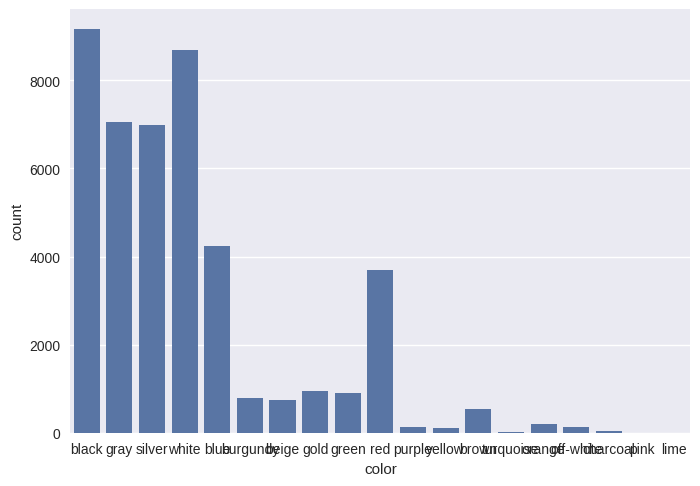

In [59]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

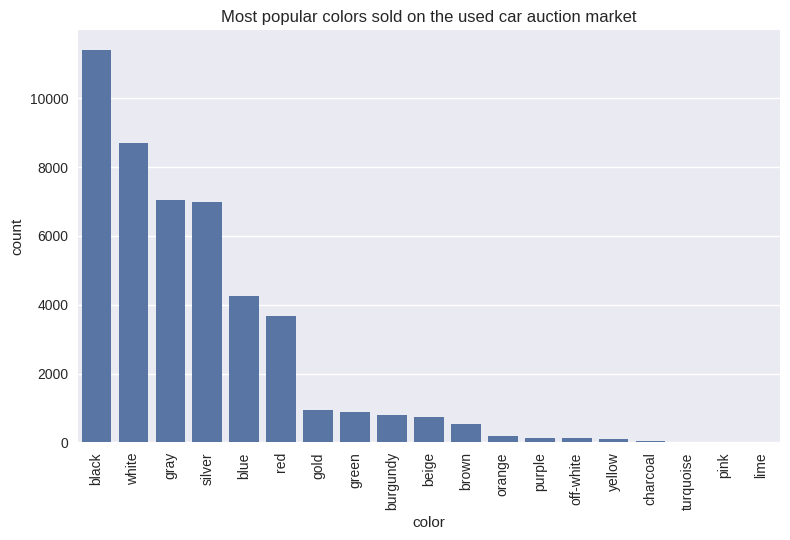

In [60]:

large_to_small = df_copy.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df_copy, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Visualization**

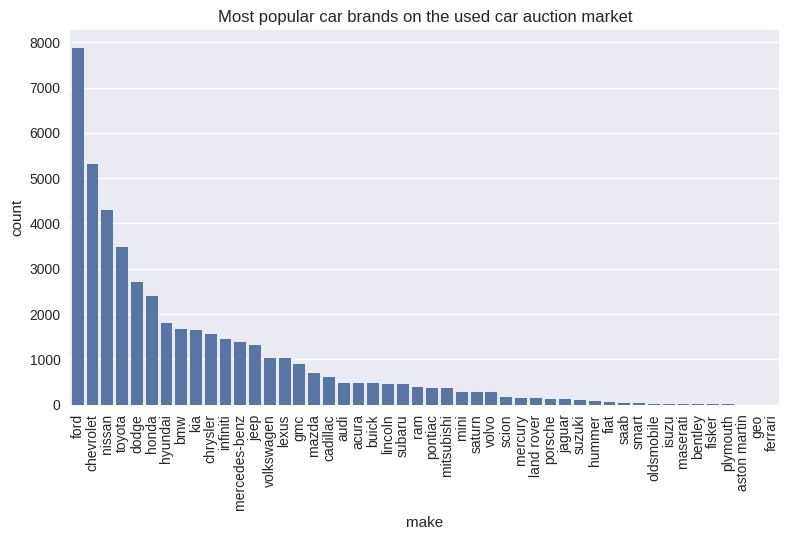

In [61]:

large_to_small = df_copy.groupby('make').size().sort_values(ascending=False)
sns.countplot(x='make', data=df_copy, order=large_to_small.index).set(title='Most popular car brands on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Visualization**

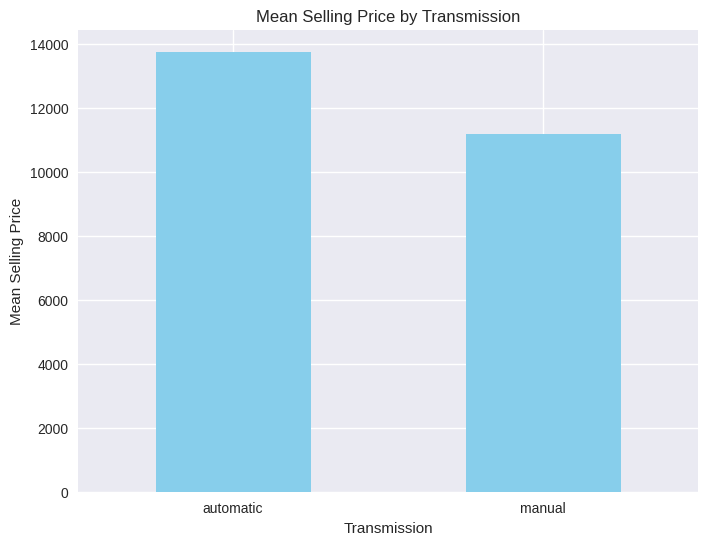

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

mean_prices = df_copy.groupby('transmission')['sellingprice in $'].mean()

# Creating the bar plot
plt.figure(figsize=(8, 6))
mean_prices.plot(kind='bar', color='skyblue')
plt.title('Mean Selling Price by Transmission')
plt.xlabel('Transmission')
plt.ylabel('Mean Selling Price')
plt.xticks(rotation=0)
plt.show()


**Visualization**

<ipython-input-63-8c7dd3660259>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='make', y='sellingprice in $', data=df_copy, palette='Set2')


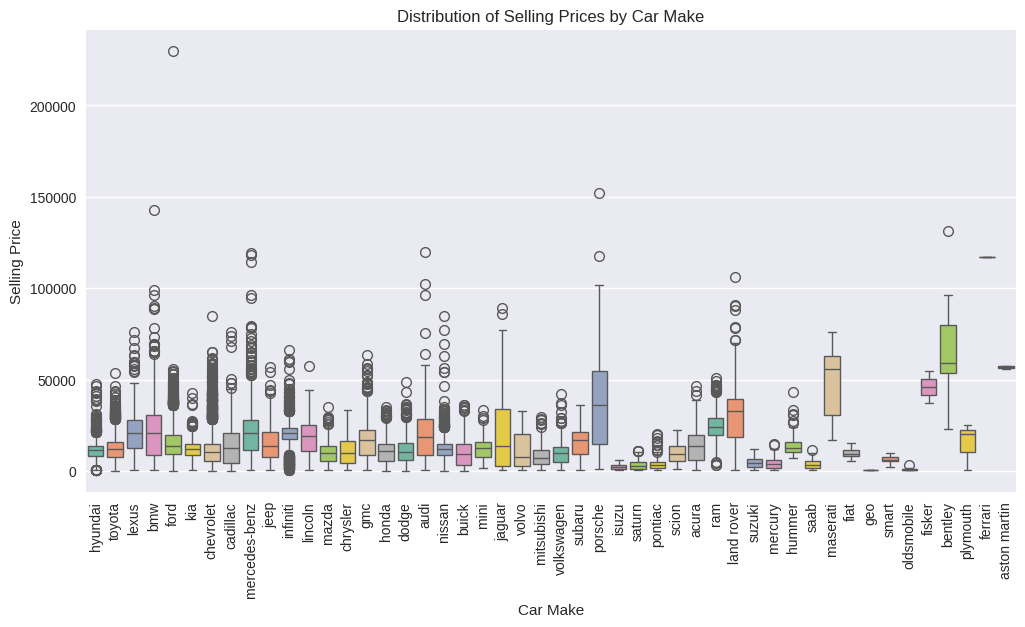

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Creating the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='make', y='sellingprice in $', data=df_copy, palette='Set2')
plt.title('Distribution of Selling Prices by Car Make')
plt.xlabel('Car Make')
plt.ylabel('Selling Price')
plt.xticks(rotation=90)
plt.show()


**Visualization**

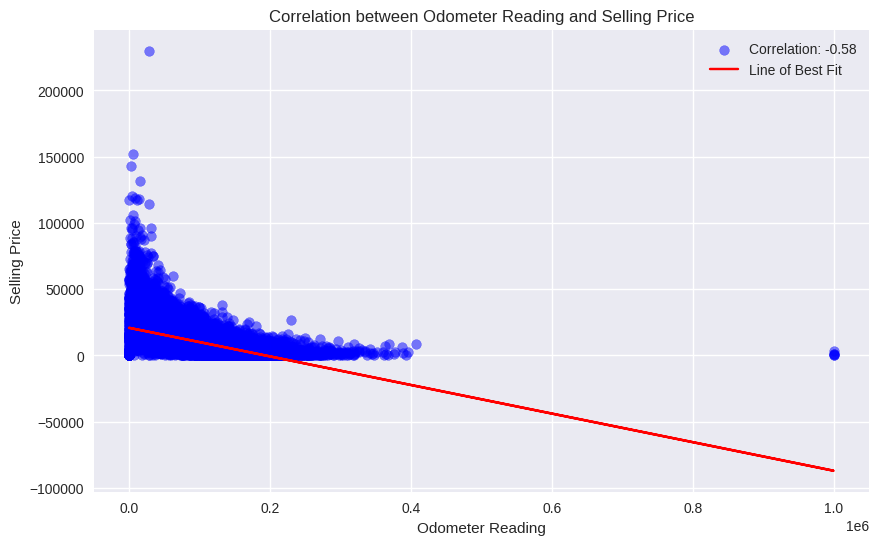

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



odometer = df_copy['odometer in miles']
selling_price = df_copy['sellingprice in $']

correlation = odometer.corr(selling_price)

plt.figure(figsize=(10, 6))
plt.scatter(odometer, selling_price, alpha=0.5, color='b', label=f'Correlation: {correlation:.2f}')
m, b = np.polyfit(odometer, selling_price, 1)
plt.plot(odometer, m * odometer + b, color='r', label=f'Line of Best Fit')
plt.title('Correlation between Odometer Reading and Selling Price')
plt.xlabel('Odometer Reading')
plt.ylabel('Selling Price')
plt.legend()
plt.grid(True)
plt.show()


**Visualization**

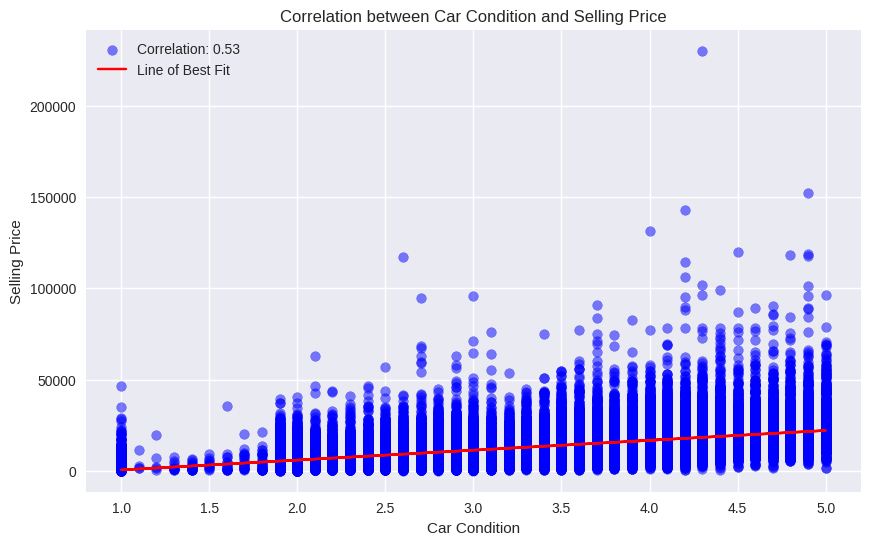

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


car_condition = df_copy['condition']
selling_price = df_copy['sellingprice in $']
correlation = car_condition.corr(selling_price)
plt.figure(figsize=(10, 6))
plt.scatter(car_condition, selling_price, alpha=0.5, color='b', label=f'Correlation: {correlation:.2f}')
m, b = np.polyfit(car_condition, selling_price, 1)
plt.plot(car_condition, m * car_condition + b, color='r', label=f'Line of Best Fit')
plt.title('Correlation between Car Condition and Selling Price')
plt.xlabel('Car Condition')
plt.ylabel('Selling Price')
plt.legend()
plt.grid(True)
plt.show()


**Visualization**

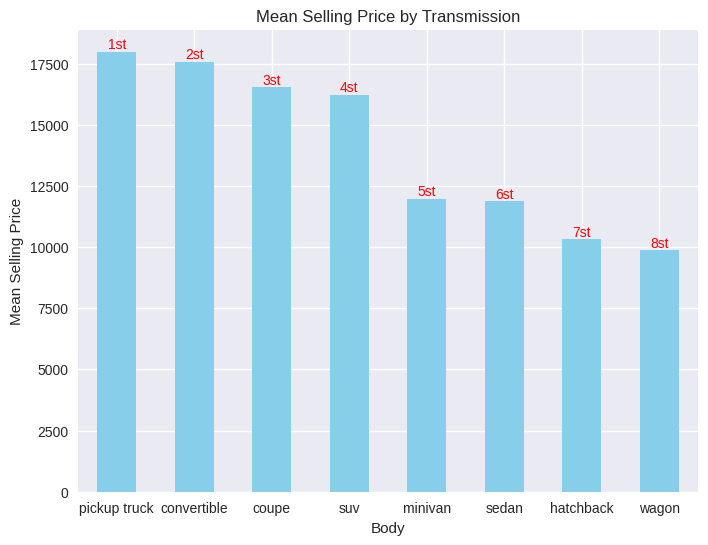

In [66]:
import pandas as pd
import matplotlib.pyplot as plt


mean_prices = df_copy.groupby('body')['sellingprice in $'].mean()
mean_prices = mean_prices.sort_values(ascending=False)
plt.figure(figsize=(8, 6))
mean_prices.plot(kind='bar', color='skyblue')
plt.title('Mean Selling Price by Transmission')
plt.xlabel('Body')
plt.ylabel('Mean Selling Price')
plt.xticks(rotation=0)
for i, price in enumerate(mean_prices, 1):
    plt.text(i - 1, price, f'{i}st', ha='center', va='bottom', fontsize=10, color='red')

plt.show()



## Data Preparation for Modelling



I have created a second copy (df_copy2) from the dataframe copy (df_copy) that was cleaned so we can apply on it one-hot encoding.

In [67]:
df_copy2=df_copy.copy()

In [68]:
df_copy2.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer in miles,color,interior,seller,mmr in $,sellingprice in $,saledate,Model_trim
0,2013,hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404,black,gray,the hertz corporation,11000,10900,2015-06-01 19:30:00+00:00,Sonata GLS
1,2014,toyota,4Runner,SR5,suv,automatic,jtezu5jr2e5064567,fl,4.9,17846,gray,black,award auto sales and leasing inc,28700,29900,2015-02-17 23:15:00+00:00,4Runner SR5
2,2012,lexus,IS 250,Base,sedan,automatic,jthbf5c24c5168599,fl,4.1,21122,silver,black,lexus financial services,22200,24200,2015-01-19 17:30:00+00:00,IS 250 Base
3,2002,bmw,X5,4.4i,suv,automatic,5uxfb33562lh33864,fl,1.9,145303,black,black,peddle llc,3675,3200,2015-03-03 23:10:00+00:00,X5 4.4i
4,2014,ford,E-Series Van,E-250,minivan,automatic,1ftne2ew0eda31832,wa,4.9,6714,white,gray,u-haul,22500,22100,2015-02-17 22:45:00+00:00,E-Series Van E-250


Encoding the categorical variables in the dataframe copy (df_copy) into numerical values using label encoding to be able to use it in the correlation.

In [69]:
from sklearn.preprocessing import LabelEncoder

#df_encoded = df_copy.copy()

# label encode 'make' feature
make_le = LabelEncoder()

make_le.fit(df['make'])
df_copy['make'] = make_le.transform(df['make'])


# label encode 'trim' feature
trim_le = LabelEncoder()

trim_le.fit(df['trim'])
df_copy['trim'] = trim_le.transform(df['trim'])

# label encode 'model' feature
model_le = LabelEncoder()

model_le.fit(df['model'])
df_copy['model'] = model_le.transform(df['model'])

# label encode 'body' feature
body_le = LabelEncoder()

body_le.fit(df['body'])
df_copy['body'] = body_le.transform(df['body'])

# label encode 'transmission' feature
transmission_le = LabelEncoder()

transmission_le.fit(df['transmission'])
df_copy['transmission'] = transmission_le.transform(df['transmission'])

# label encode 'color' feature
color_le = LabelEncoder()

color_le.fit(df['color'])
df_copy['color'] = color_le.transform(df['color'])

# label encode 'interior' feature
interior_le = LabelEncoder()

interior_le.fit(df['interior'])
df_copy['interior'] =interior_le.transform(df['interior'])



In [70]:
df_copy.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer in miles,color,interior,seller,mmr in $,sellingprice in $,saledate,Model_trim
0,2013,18,532,494,6,0,5npeb4acxdh702805,ma,3.9,50404,1,6,the hertz corporation,11000,10900,2015-06-01 19:30:00+00:00,Sonata GLS
1,2014,44,17,847,5,0,jtezu5jr2e5064567,fl,4.9,17846,7,16,award auto sales and leasing inc,28700,29900,2015-02-17 23:15:00+00:00,4Runner SR5
2,2012,25,287,278,6,0,jthbf5c24c5168599,fl,4.1,21122,15,1,lexus financial services,22200,24200,2015-01-19 17:30:00+00:00,IS 250 Base
3,2002,3,607,209,5,0,5uxfb33562lh33864,fl,1.9,145303,1,1,peddle llc,3675,3200,2015-03-03 23:10:00+00:00,X5 4.4i
4,2014,13,161,382,3,0,1ftne2ew0eda31832,wa,4.9,6714,17,6,u-haul,22500,22100,2015-02-17 22:45:00+00:00,E-Series Van E-250


Creating correlation matrix.

<ipython-input-71-eb8830fafcfa>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_copy.corr()


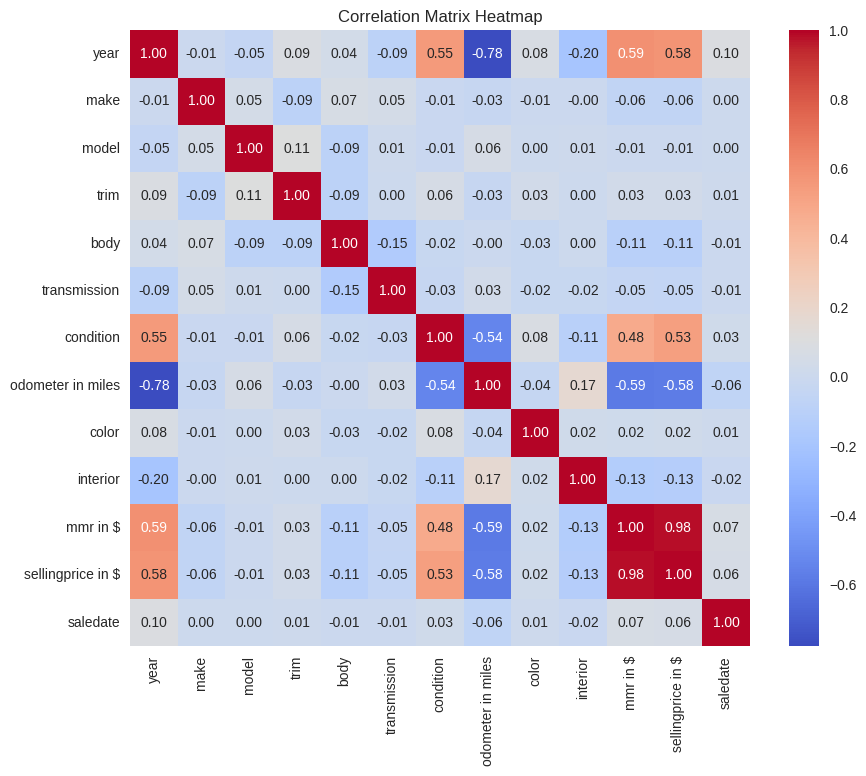

In [71]:
import matplotlib.pylab as plt
import seaborn as sns
df_copy['saledate'] = df['saledate'].apply(lambda x: x.timestamp())
corr_matrix = df_copy.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()



Dropping features that logically do not make sense to be included in our model. These include: 'seller', 'state', 'vin', 'color', 'color_encoded', 'interior'and 'interior_encoded' As all these features will not affect the selling price of the car.

In [72]:

columns_to_drop = ['seller','state','vin','color','color_encoded','interior','interior_encoded']
columns_to_drop = [col for col in columns_to_drop if col in df_copy.columns]
df_copy = df_copy.drop(columns=columns_to_drop)
df_copy = df_copy.drop(columns=columns_to_drop, errors='ignore')
df_copy.head()

,year,make,model,trim,body,transmission,condition,odometer in miles,mmr in $,sellingprice in $,saledate,Model_trim
0,2013,18,532,494,6,0,3.9,50404,11000,10900,1.433187e+09,Sonata GLS
1,2014,44,17,847,5,0,4.9,17846,28700,29900,1.424215e+09,4Runner SR5
2,2012,25,287,278,6,0,4.1,21122,22200,24200,1.421689e+09,IS 250 Base
3,2002,3,607,209,5,0,1.9,145303,3675,3200,1.425424e+09,X5 4.4i
4,2014,13,161,382,3,0,4.9,6714,22500,22100,1.424213e+09,E-Series Van E-250



After tracing back to the correlation matrix, I found out that the MMR (independent variable) is having a very strong positive correlation with the selling price (dependent variable). So, it should be eliminated to avoid overfitting so that the model can be generalized.


In [73]:
df_copy = df_copy.drop('mmr in $', axis=1)
df_copy.head()

,year,make,model,trim,body,transmission,condition,odometer in miles,sellingprice in $,saledate,Model_trim
0,2013,18,532,494,6,0,3.9,50404,10900,1.433187e+09,Sonata GLS
1,2014,44,17,847,5,0,4.9,17846,29900,1.424215e+09,4Runner SR5
2,2012,25,287,278,6,0,4.1,21122,24200,1.421689e+09,IS 250 Base
3,2002,3,607,209,5,0,1.9,145303,3200,1.425424e+09,X5 4.4i
4,2014,13,161,382,3,0,4.9,6714,22100,1.424213e+09,E-Series Van E-250


Above, I created another copy (df_copy2) from the clean data copy (df_copy). Here I am dropping the columns that I want to eliminate that will not affect our model. So, I can use this copy to build the linear regression model.

In [74]:

columns_to_drop = ['seller','state','vin','color','color_encoded','interior','interior_encoded','mmr in $','saledate','Model_trim']
columns_to_drop = [col for col in columns_to_drop if col in df_copy2.columns]
df_copy2 = df_copy2.drop(columns=columns_to_drop)
df_copy2 = df_copy2.drop(columns=columns_to_drop, errors='ignore')
df_copy2.head()


,year,make,model,trim,body,transmission,condition,odometer in miles,sellingprice in $
0,2013,hyundai,Sonata,GLS,sedan,automatic,3.9,50404,10900
1,2014,toyota,4Runner,SR5,suv,automatic,4.9,17846,29900
2,2012,lexus,IS 250,Base,sedan,automatic,4.1,21122,24200
3,2002,bmw,X5,4.4i,suv,automatic,1.9,145303,3200
4,2014,ford,E-Series Van,E-250,minivan,automatic,4.9,6714,22100


Applying one hot encoding to the attributes that will be used from the dataframe copy (df_copy2) to be able to use it in the model.

In [75]:
categorical_columns = ['body','trim', 'make','transmission','model']
df_encode = pd.get_dummies(data=df_copy2,
                           columns=categorical_columns,
                           drop_first=True,
                           dtype='int8')


print('Columns in original data frame:\n',df_copy2.columns.values)
print('\nNumber of rows and columns in the dataset:',df_copy2.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['year' 'make' 'model' 'trim' 'body' 'transmission' 'condition'
 'odometer in miles' 'sellingprice in $']

Number of rows and columns in the dataset: (46578, 9)

Columns in data frame after encoding dummy variable:
 ['year' 'condition' 'odometer in miles' ... 'model_xA' 'model_xB'
 'model_xD']

Number of rows and columns in the dataset: (46578, 1802)


In [76]:
df_encode.head()

year  condition  odometer in miles  sellingprice in $  body_coupe  \
0  2013        3.9              50404              10900           0   
1  2014        4.9              17846              29900           0   
2  2012        4.1              21122              24200           0   
3  2002        1.9             145303               3200           0   
4  2014        4.9               6714              22100           0   

   body_hatchback  body_minivan  body_pickup truck  body_sedan  body_suv  \
0               0             0                  0           1         0   
1               0             0                  0           0         1   
2               0             0                  0           1         0   
3               0             0                  0           0         1   
4               0             1                  0           0         0   

   body_wagon  trim_(1999.5) XE  trim_+  trim_1  trim_1.6  trim_1.6 S  \
0           0                 0       0       0         0           0   
1           0                 0       0       0         0           0   
2           0                 0       0       0         0           0   
3           0                 0       0       0         0           0   
4           0                 0       0       0         0           0   

   trim_1.6 S Plus  trim_1.6 SL  trim_1.6 SV  trim_1.8  trim_1.8 Base  \
0                0            0            0         0              0   
1                0            0            0         0              0   
2                0            0            0         0              0   
3                0            0            0         0              0   
4                0            0            0         0              0   

   trim_1.8 S  trim_1.8 S Krom Edition  trim_1.8 SL  trim_1.8 TFSI Premium  \
0           0                        0            0                      0   
1           0                        0            0                      0   
2           0                        0            0                      0   
3           0                        0            0                      0   
4           0                        0            0                      0   

   trim_1.8T  trim_1.8T Avant quattro  trim_1.8T quattro  trim_1.9  \
0          0                        0                  0         0   
1          0                        0                  0         0   
2          0                        0                  0         0   
3          0                        0                  0         0   
4          0                        0                  0         0   

   trim_10th Anniversary  trim_128i  trim_135i  trim_150 Low Roof  trim_1500  \
0                      0          0          0                  0          0   
1                      0          0          0                  0          0   
2                      0          0          0                  0          0   
3                      0          0          0                  0          0   
4                      0          0          0                  0          0   

   trim_1500 High Roof  trim_1500 LS  trim_1500 LT  trim_1500 LT1  \
0                    0             0             0              0   
1                    0             0             0              0   
2                    0             0             0              0   
3                    0             0             0              0   
4                    0             0             0              0   

   trim_1500 LTZ  trim_1500 Low Roof  trim_1500 S  trim_1500 SLE  trim_1794  \
0              0                   0            0              0          0   
1              0                   0            0              0          0   
2              0                   0            0              0          0   
3              0                   0            0              0          0   
4              0                   0            0     

## Modelling




Splitting the dataset into traning and testing datasets.

In [77]:

from sklearn.model_selection import train_test_split

x = df_encode.drop('sellingprice in $',axis=1)
y = df_encode['sellingprice in $']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])




Training dataset size: 37262
Testing dataset size: 9316


We trained our model to the training dataset.

In [78]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train);

Inspectting the parameters of the fitted linear regression model.

In [79]:
parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(x.shape[1])]
columns = ['y-intersect'] + list(x.columns.values)
sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))

parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta})
parameter_df


,parameter,column,theta_value
0,theta_0,y-intersect,-2.023336e+06
1,theta_1,year,1.017475e+03
2,theta_2,condition,1.278375e+03
3,theta_3,odometer in miles,-4.424646e-02
4,theta_4,body_coupe,-8.976492e+02
...,...,...,...
1797,theta_1797,model_malibu,-5.671363e+03
1798,theta_1798,model_tC,-2.035749e+02
1799,theta_1799,model_xA,3.077680e+03
1800,theta_1800,model_xB,-2.642204e+03


## Model Evaluation




Evaluating the model to check its accuracy.

In [80]:
# sklearn regression module
y_pred = lin_reg.predict(x_test)

# Evaluation
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred, y_test, squared=False)

# R_square
R_square = lin_reg.score(x_test,y_test)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)

The root mean square error (RMSE) is:  3554.546733219146
R^2 obtained is: 0.8632440634860724


## Conclusion :



I evaluate the model to be accurate as the R-squared value is 0.86, which is not too low indicating failure of model prediction and not too high indicating overfiiting or a non-generalizable model. Based on the model, I can conclude that the following independnet variables: 'body','trim', 'make','transmission','model' are essential to predict the selling prices (dependent variable) of used cars.
